In [26]:
import torch
import matplotlib.pyplot as plt

## 反向传播
---

In [9]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [10]:
x.requires_grad_(True)
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [11]:
x.grad

In [12]:
y = 2*torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [13]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [14]:
x.grad == 4*x

tensor([True, True, True, True])

In [15]:
x.grad.zero_() # 在默认情况下，PyTorch会累积梯度,需要清除
z = x.sum()
z.backward()
x.grad


tensor([1., 1., 1., 1.])

## 非标量变量的反向传播
---

In [16]:
x.grad.zero_()
v = x*x
v.backward()
x.grad

RuntimeError: grad can be implicitly created only for scalar outputs

In [17]:
x.grad.zero_()
y = x*x
y.backward(torch.ones(len(x)))  # 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
                                # 本例只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad

tensor([0., 2., 4., 6.])

In [18]:
x.grad.zero_()
y = x * x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

## 分离计算
---

In [19]:
x.grad.zero_()
u = x*x
t = u.detach()
w = t*x

w.sum().backward()
x.grad == t

tensor([True, True, True, True])

In [20]:
x.grad.zero_()
u.sum().backward()
x.grad == 2*x

tensor([True, True, True, True])

## Python控制流的梯度计算
---

In [21]:
def f(a):
    b = a*2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100*b
    return c

a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()
a, a.grad, d

(tensor(1.0535, requires_grad=True),
 tensor(1024.),
 tensor(1078.7521, grad_fn=<MulBackward0>))

In [22]:
def f(a, n):
    b = a*2
    while b.norm() < n:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100*b
    return c

a = torch.randn(size=(), requires_grad=True)
n = torch.randint(1000, 2000, (1,))
d = f(a, n)
d.backward()
a, n, a.grad, d, a.grad == d/a

(tensor(-0.6258, requires_grad=True),
 tensor([1726]),
 tensor(409600.),
 tensor(-256308.2969, grad_fn=<MulBackward0>),
 tensor(True))

## Exercises
---

1. 为什么计算二阶导数比一阶导数的开销要更大？

2. 在运行反向传播函数之后，立即再次运行它，看看会发生什么

In [23]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True)
print(x)
y = 2*x
y.sum().backward()
print(x.grad)
y.sum().backward()
print(x.grad)

tensor([0., 1., 2.], requires_grad=True)
tensor([2., 2., 2.])


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

3. 在控制流的例子中，我们计算$d$关于$a$的导数，如果将变量$a$更改为随机向量或矩阵，会发生什么?

In [24]:
def f(a, n):
    b = a*2
    while b.norm() < n:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100*b
    return c

a = torch.randn(size=(2,3), requires_grad=True)
n = torch.randint(1000, 2000, (1,))
d = f(a, n)
d.sum().backward()
a, n, a.grad, d, a.grad == d/a

(tensor([[ 1.0874,  0.5535, -0.1674],
         [ 0.0189,  0.5115, -1.7391]], requires_grad=True),
 tensor([1079]),
 tensor([[512., 512., 512.],
         [512., 512., 512.]]),
 tensor([[ 556.7673,  283.3932,  -85.6927],
         [   9.7016,  261.8738, -890.4095]], grad_fn=<MulBackward0>),
 tensor([[True, True, True],
         [True, True, True]]))

4. 重新设计一个求控制流梯度的例子，运行并分析结果

5. 使$f(x)=sin(x)$，绘制$f(x)$和$\frac{df(x)}{dx}$的图像，其中后者不使用$f'(x)=cos(x)$

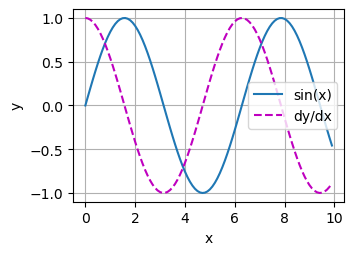

In [28]:
x = torch.arange(0.,10,0.1, requires_grad=True)
y = torch.sin(x)
y.sum().backward()

plt.rcParams['figure.figsize'] = (3.5, 2.5)
fmts = ('-', 'm--', 'g-.', 'r:')

x, y = x.detach(), [y.detach(), x.grad]
xlabel = 'x'
ylabel = 'y'
xscale = 'linear'
yscale = 'linear'
legends = ['sin(x)', 'dy/dx']
xlim = None
ylim = None
axes = plt.gca()
axes.plot(x, y[0], fmts[0])
axes.plot(x, y[1], fmts[1])
axes.set_xlim(xlim)
axes.set_ylim(ylim)
axes.set_xlabel(xlabel)
axes.set_ylabel(ylabel)
axes.set_xscale(xscale)
axes.set_yscale(yscale)
axes.legend(legends)
axes.grid()
